In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
df=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
df.isnull().sum

<bound method DataFrame.sum of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False 

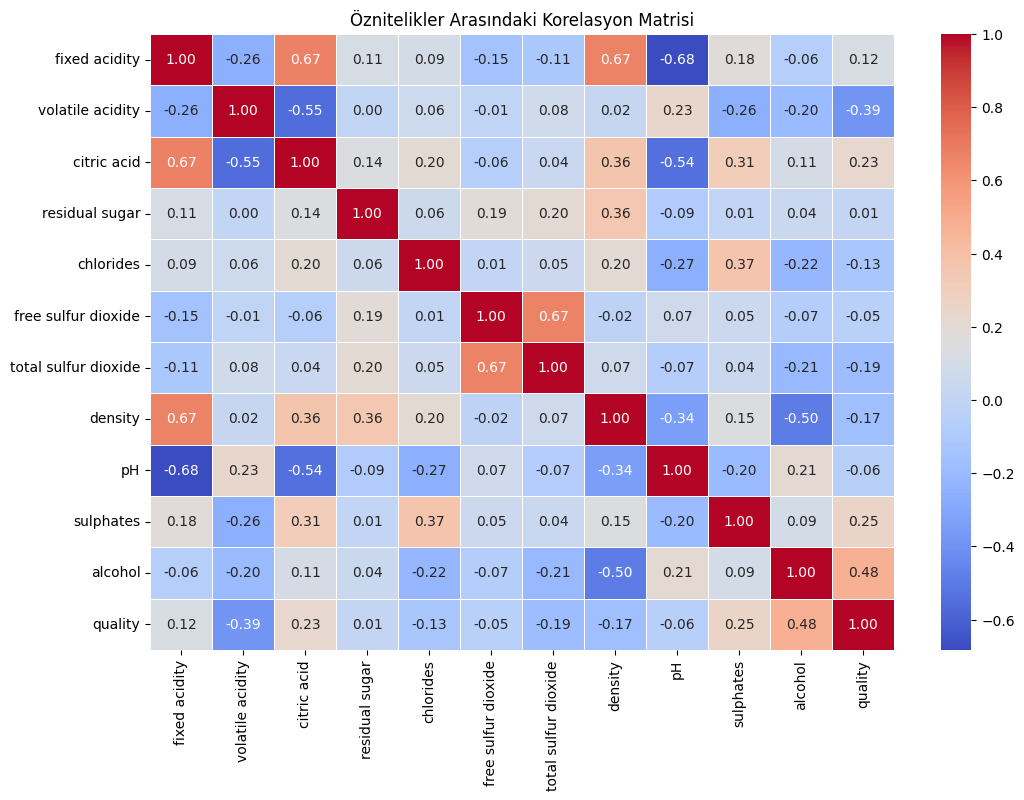

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Öznitelikler Arasındaki Korelasyon Matrisi")
plt.show()


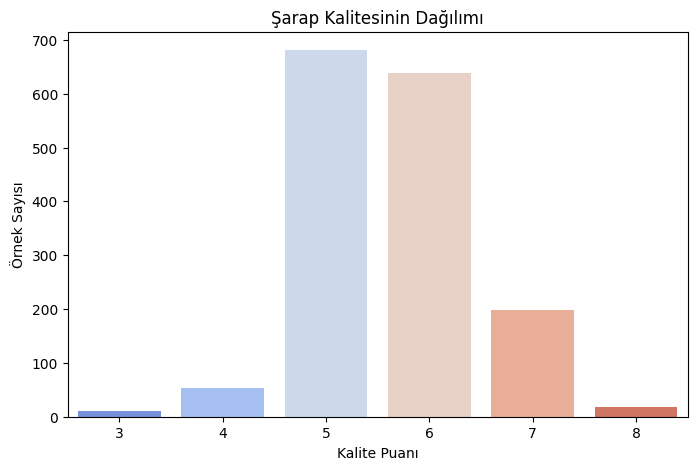

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["quality"], palette="coolwarm")
plt.title("Şarap Kalitesinin Dağılımı")
plt.xlabel("Kalite Puanı")
plt.ylabel("Örnek Sayısı")
plt.show()

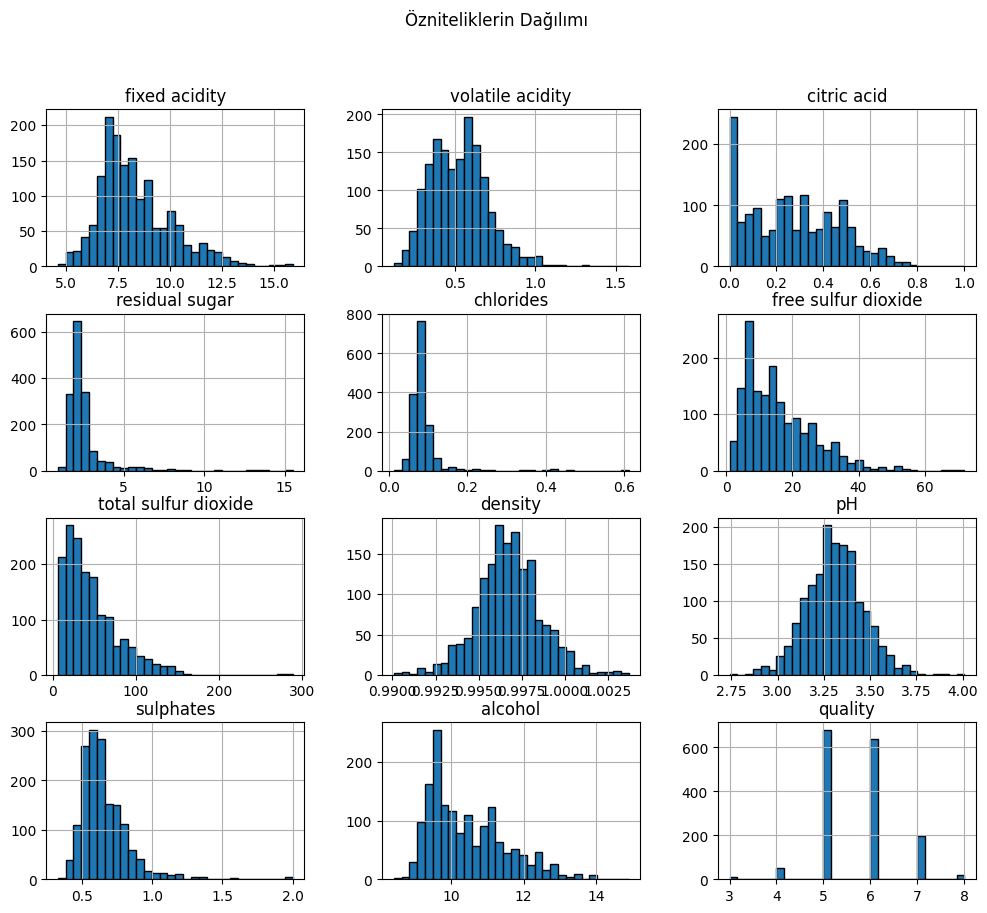

In [6]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Özniteliklerin Dağılımı")
plt.show()


In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
df['premiumquality'] = [1 if x>=7 else 0 for x in df['quality']]
df['premiumquality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: premiumquality, Length: 1599, dtype: int64

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,premiumquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [10]:
X = df.drop(['quality','premiumquality', 'residual sugar'],axis=1)
Y = df['premiumquality']

In [11]:
df['premiumquality'].value_counts()

premiumquality
0    1382
1     217
Name: count, dtype: int64

In [12]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [13]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: premiumquality, Length: 1599, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

print("Rastgele Orman Modeli Sonuçları:")
print("Doğruluk Skoru:", accuracy_score(Y_test, y_pred_rf))
print("F1 Skoru:", f1_score(Y_test, y_pred_rf, average="weighted"))


Rastgele Orman Modeli Sonuçları:
Doğruluk Skoru: 0.8979166666666667
F1 Skoru: 0.8928280187230306


In [20]:
# 	fixed acidity 	volatile acidity 	citric acid 	chlorides 	free sulfur dioxide 	total sulfur dioxide 	density 	pH 	sulphates 	alcohol
new_sample = [[5.4, 0.25, 0.29, 0.054, 19.0, 49.0, 0.99666, 3.40, 0.76, 11]] 
new_sample_scaled = scaler.transform(new_sample)
predicted_quality = rf_model.predict(new_sample_scaled)
print("Tahmin Edilen Şarap Kalitesi:", predicted_quality[0])

Tahmin Edilen Şarap Kalitesi: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
df[df['premiumquality'] == 1]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,premiumquality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,1


In [22]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
y_pred_dt = dt_model.predict(X_test)

print("Karar Ağacı Modeli Sonuçları:")
print("Doğruluk Skoru:", accuracy_score(Y_test, y_pred_dt))
print("F1 Skoru:", f1_score(Y_test, y_pred_dt, average="weighted"))


Karar Ağacı Modeli Sonuçları:
Doğruluk Skoru: 0.8583333333333333
F1 Skoru: 0.8662961529399885


In [23]:
svm_model = SVC(kernel="rbf")
svm_model.fit(X_train, Y_train)
y_pred_svm = svm_model.predict(X_test)

print("Destek Vektör Makineleri Modeli Sonuçları:")
print("Doğruluk Skoru:", accuracy_score(Y_test, y_pred_svm))
print("F1 Skoru:", f1_score(Y_test, y_pred_svm, average="weighted"))


Destek Vektör Makineleri Modeli Sonuçları:
Doğruluk Skoru: 0.8833333333333333
F1 Skoru: 0.8606859883236031


In [24]:
Y_train_adj = Y_train - Y_train.min()
Y_test_adj = Y_test - Y_test.min()

from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train_adj)
y_pred_xgb = xgb_model.predict(X_test)

y_pred_xgb = y_pred_xgb + Y_train.min()

print("XGBoost Modeli Sonuçları:")
print("Doğruluk Skoru:", accuracy_score(Y_test, y_pred_xgb))
print("F1 Skoru:", f1_score(Y_test, y_pred_xgb, average="weighted"))


XGBoost Modeli Sonuçları:
Doğruluk Skoru: 0.8875
F1 Skoru: 0.8850892857142857


In [25]:
log_reg_model = LogisticRegression(max_iter=3000, solver="saga", random_state=42)


log_reg_model.fit(X_train, Y_train)


y_pred_log_reg = log_reg_model.predict(X_test)


print("Lojistik Regresyon Modeli Sonuçları:")
print("Doğruluk Skoru:", accuracy_score(Y_test, y_pred_log_reg))
print("F1 Skoru:", f1_score(Y_test, y_pred_log_reg, average="weighted"))

Lojistik Regresyon Modeli Sonuçları:
Doğruluk Skoru: 0.88125
F1 Skoru: 0.8695849996034937


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

model_scores = {
    "Random Forest": [accuracy_score(Y_test, y_pred_rf), f1_score(Y_test, y_pred_rf, average="weighted")],
    "Karar Ağacı": [accuracy_score(Y_test, y_pred_dt), f1_score(Y_test, y_pred_dt, average="weighted")],
    "Destek Vektör Makineleri (SVM)": [accuracy_score(Y_test, y_pred_svm), f1_score(Y_test, y_pred_svm, average="weighted")],
    "XGBoost": [accuracy_score(Y_test, y_pred_xgb), f1_score(Y_test, y_pred_xgb, average="weighted")],
    "Lojistik Regresyon": [accuracy_score(Y_test, y_pred_log_reg), f1_score(Y_test, y_pred_log_reg, average="weighted")]
}

model_df = pd.DataFrame(model_scores, index=["Doğruluk Skoru", "F1 Skoru"])





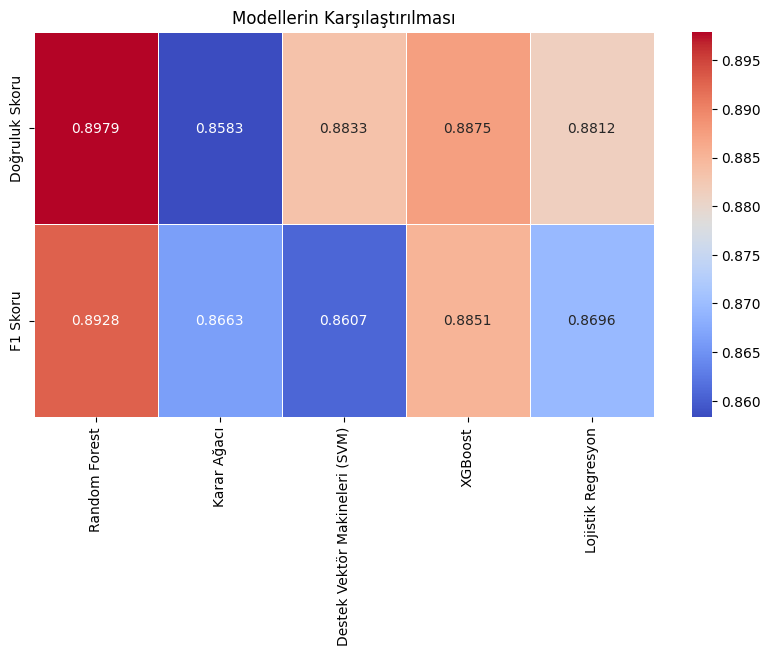

In [27]:
plt.figure(figsize=(10, 5))
sns.heatmap(model_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Modellerin Karşılaştırılması")
plt.show()



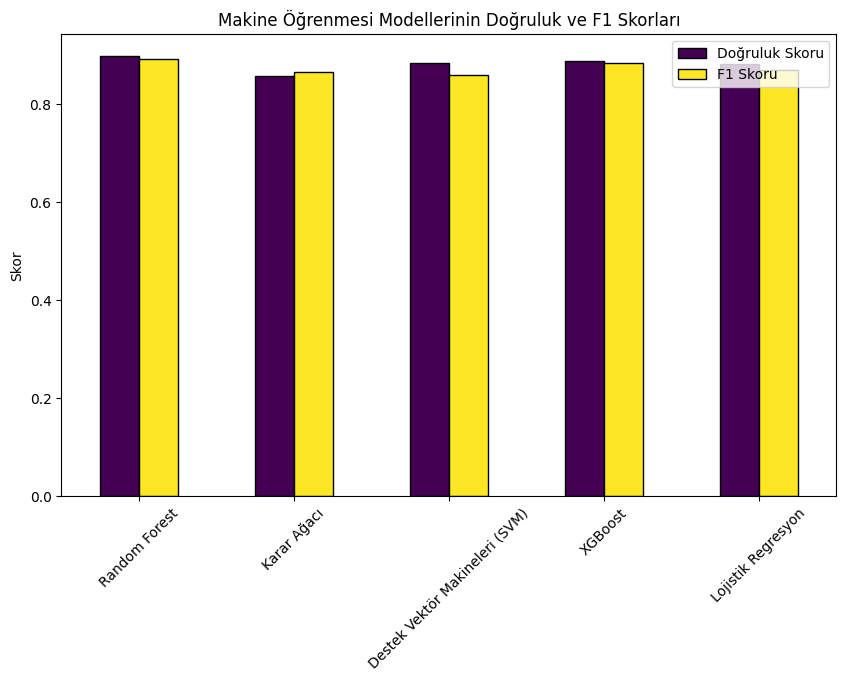

In [28]:
model_df.T.plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")
plt.xticks(rotation=45)
plt.title("Makine Öğrenmesi Modellerinin Doğruluk ve F1 Skorları")
plt.ylabel("Skor")
plt.legend(["Doğruluk Skoru", "F1 Skoru"])
plt.show()